In [2]:
import random
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report

In [1]:
import pandas as pd

In [2]:
path = '/home/ifte-home/Documents/mental_health/suicide/CSSRS/'

In [3]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/CSSRS/500_Reddit_users_posts_labels.csv', encoding = "ISO-8859-1")

In [4]:
df

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation
...,...,...,...
495,user-495,"['Its not the end, it just feels that way. Or ...",Supportive
496,user-496,"['It was a skype call, but she ended it and Ve...",Indicator
497,user-497,['That sounds really weird.Maybe you were Dist...,Supportive
498,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt


In [7]:
df.Label.value_counts()

Ideation      171
Supportive    108
Indicator      99
Behavior       77
Attempt        45
Name: Label, dtype: int64

In [3]:
def generate_dataset(categories, res):
    data = []
    category = []
    for p in res:
        data.append(''.join(p))
        category.append(categories)

    return pd.DataFrame(zip(data,category), columns=['Post', 'Label'])

In [5]:
import random 
categories = ['Attempt']
file_names = [ 'suicidal_attempt.csv']

sentence_num = 10
index = 0
dataset = pd.DataFrame()

for items in file_names:
    frame = pd.read_csv(path+items)
    # print(datframe.columns)
    col_name = list(frame.columns)
    if index==0:
        size=4
    elif index==1:
        size=52
    elif index==3:
        size=14
    else:
        size=45
    for k in range(size):        
        temp = [col_name[i:i+sentence_num] for i in range(0, len(col_name), sentence_num)]
        dataset = pd.concat([dataset,generate_dataset(categories[index], temp)])
        random.shuffle(col_name)
    index+=1
#     break
dataset = dataset.sample(frac=1)

In [8]:
categories = ['Indicator', 'Attempt','Behavior','Ideation']
file_names = ['suicidal_indicator.csv', 
              'suicidal_attempt.csv', 
              'suicidal_behavior.csv', 
              'suicidal_ideation.csv']

sentence_num = 10
index = 0
dataset = pd.DataFrame()

for items in file_names:
    frame = pd.read_csv(path+items)
    # print(datframe.columns)
    col_name = list(frame.columns)
    if index==0:
        size=4
    elif index==1:
        size=52
    elif index==3:
        size=14
    else:
        size=45
    for k in range(size):        
        temp = [col_name[i:i+sentence_num] for i in range(0, len(col_name), sentence_num)]
        dataset = pd.concat([dataset,generate_dataset(categories[index], temp)])
        random.shuffle(col_name)
    index+=1
#     break
dataset = dataset.sample(frac=1)

In [6]:
dataset.Label.value_counts()

Attempt    52
Name: Label, dtype: int64

In [9]:
dataset.to_csv(path+'Reddit C-SSRS Suicide Attempt labeled Dataset.csv')

In [9]:
total_dataframe = pd.concat([df,dataset])

In [10]:
total_dataframe

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation
...,...,...,...
1,NaN,I jumped Suicide or self-injury by placing se...,Attempt
7,NaN,Suicide or self-injury by jumping from bridge...,Attempt
11,NaN,Went in the freezer Suicide or self-inflicted...,Attempt
1,NaN,Involuntary hold Suicide or self-injury by sc...,Attempt


In [11]:
total_dataframe.Label.value_counts()

Ideation      171
Supportive    108
Indicator      99
Attempt        97
Behavior       77
Name: Label, dtype: int64

In [12]:
total_dataframe = total_dataframe[total_dataframe['Label']!='Supportive']

In [14]:
total_dataframe = pd.read_csv(path+'Reddit C-SSRS Suicide Dataset.csv', index_col=0)

In [13]:
total_dataframe = total_dataframe[total_dataframe['Label']=='Attempt']

## Preprocessing of dataset

In [15]:
from ipynb.fs.full.preprocess_text import preprocess

In [16]:
total_dataframe['Post'] = total_dataframe.Post.apply(lambda x: preprocess(x))

In [17]:
from ipynb.fs.full import preprocess_dataset

In [ ]:
total_dataframe = preprocess_dataset()

In [18]:
total_dataframe['processed'] = total_dataframe.Post.apply(lambda x: preprocess(x))

In [18]:
total_dataframe = total_dataframe[['Post', 'Label']]

In [20]:
total_dataframe.to_csv(path+'Reddit C-SSRS Suicide Attempt Dataset.csv')

In [42]:
total_dataframe.to_csv(path+'Reddit C-SSRS Suicide Dataset.csv')

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(path+'Reddit C-SSRS Suicide Dataset.csv', index_col=0)

In [30]:
df = total_dataframe

In [14]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['code'] = Le.fit_transform(df['Label'])

In [7]:
df.to_csv(path+'Reddit C-SSRS Suicide Dataset.csv')

NameError: name 'df' is not defined

In [15]:
df

,User,Post,Label,processed,code
1,user-1,['It can be hard to appreciate the notion that...,Ideation,hard appreci notion could meet someon els make...,2
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior,hi last night wa sit ledg window contempl whet...,1
3,user-3,['I tried to kill my self once and failed badl...,Attempt,tri kill self onc fail badli caus moment want ...,0
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation,hi nem sort thing enjoy person alway welcom mu...,2
7,user-7,"['Dont see it as failing at killing yourself, ...",Ideation,dont see fail kill reason whi live someth eart...,2
...,...,...,...,...,...
73,NaN,Phencyclidine induced mental problem Tolerant...,Indicator,phencyclidin induc mental problem toler metal ...,3
10,NaN,Assault by corrosive substance incomplete att...,Behavior,assault corros substanc incomplet attempt buy ...,1
17,NaN,Skin disorder due to physical agent or foreig...,Indicator,skin disord due physic agent foreign substanc ...,3
108,NaN,Family history of neurological disorder Hodgk...,Indicator,famili histori neurolog disord hodgkin diseas ...,3


In [25]:
from sklearn.preprocessing import FunctionTransformer

In [27]:
pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])

vectorized_data = pipeline.fit_transform(df['processed'])

n_x_train, n_x_val, n_y_train, n_y_val = train_test_split(vectorized_data, 
                                                    df.code, test_size=0.2, 
                                                    random_state=0)

In [33]:
n_x_train = n_x_train.todense()

AttributeError: 'matrix' object has no attribute 'todense'

## Applying Grid searching in classifiers

In [71]:
seed=1
models = [
#             'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
#         AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')
        ]
params = {
#             models[0]:{'learning_rate':[0.01], 'n_estimators':[150]},
            models[0]:{'learning_rate':[0.01],'n_estimators':[100], 'max_depth':[3],
                       'min_samples_split':[2],'min_samples_leaf': [2]},
            models[1]:{'n_estimators':[100], 'criterion':['gini'],'min_samples_split':[2],
                      'min_samples_leaf': [4]},
            models[2]:{'n_neighbors':[5], 'weights':['distance'],'leaf_size':[15]},
            models[3]: {'C':[100], 'tol': [0.005],
                       'kernel':['sigmoid']},
            models[4]: {'C':[2000], 'tol': [0.0001]}
         }

In [72]:
test_scores = []

for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], refit='True', n_jobs=-1, cv=5)
    clf.fit(n_x_train, n_y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(n_x_val)
    acc = accuracy_score(n_y_val, clf.predict(n_x_val))
    print("Accuracy: {:.4%}".format(acc))
    
    test_scores.append((acc,clf.best_score_))

GBC


KeyboardInterrupt: 

In [73]:
param_grid = {'kernel': ['rbf'] , 
              'gamma': [0.2, 0.4, 0.7, 2], 
              'degree' : [2]}

clf = GridSearchCV(SVC() , param_grid , refit=True , verbose=3)
clf.fit(n_x_train, n_y_train)

print("best params: " + str(clf.best_params_))
print("best scores: " + str(clf.best_score_))
estimates = clf.predict_proba(n_x_val)
acc = accuracy_score(n_y_val, clf.predict(n_x_val))
print('Predict_prob', estimates , "Accuracy: {:.4%}".format(acc))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...degree=2, gamma=0.2, kernel=rbf;, score=0.507 total time=   7.7s
[CV 2/5] END ...degree=2, gamma=0.2, kernel=rbf;, score=0.558 total time=   5.2s
[CV 3/5] END ...degree=2, gamma=0.2, kernel=rbf;, score=0.529 total time=   4.9s
[CV 4/5] END ...degree=2, gamma=0.2, kernel=rbf;, score=0.587 total time=   5.0s
[CV 5/5] END ...degree=2, gamma=0.2, kernel=rbf;, score=0.577 total time=   5.2s
[CV 1/5] END ...degree=2, gamma=0.4, kernel=rbf;, score=0.514 total time=   5.1s
[CV 2/5] END ...degree=2, gamma=0.4, kernel=rbf;, score=0.558 total time=   5.1s
[CV 3/5] END ...degree=2, gamma=0.4, kernel=rbf;, score=0.565 total time=   5.2s
[CV 4/5] END ...degree=2, gamma=0.4, kernel=rbf;, score=0.594 total time=   5.2s
[CV 5/5] END ...degree=2, gamma=0.4, kernel=rbf;, score=0.591 total time=   5.3s
[CV 1/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.522 total time=   5.5s
[CV 2/5] END ...degree=2, gamma=0.7, kernel=rbf;,

AttributeError: predict_proba is not available when  probability=False

In [34]:
names = [
#     "Nearest Neighbors",
#     "RBF SVM",
    "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
#     KNeighborsClassifier(),
#     SVC(kernel="rbf"),
    GaussianProcessClassifier(),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [36]:
for name, clf in zip(names,classifiers):
    print(name)
#     n_x_train = n_x_train.toarray()
#     if name=='Gaussian Process':
#         n_x_train = n_x_train.toarray()
#         clf.fit(n_x_train, n_y_train)
#     else:
    clf.fit(n_x_train, n_y_train)
        
    score = clf.score(n_x_val, n_y_val)

#     print("best params: " + str(clf.best_params_))
#     print("best scores: " + str(clf.best_score_))
#     estimates = clf.predict_proba(n_x_val)
    y_pred = clf.predict(n_x_val)
    print('Precision: %.3f' % precision_score(n_y_val, y_pred, average='weighted'),
          'Recall: %.3f' % recall_score(n_y_val, y_pred, average='weighted'),
          "Accuracy: {:.4%}".format(accuracy_score(n_y_val, y_pred)),
          'F1 Score: %.3f' % f1_score(n_y_val, y_pred, average='weighted'))

Gaussian Process


/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  Futu

Precision: 0.940 Recall: 0.921 Accuracy: 92.0852% F1 Score: 0.924
Naive Bayes


/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  Futu

Precision: 0.923 Recall: 0.918 Accuracy: 91.7808% F1 Score: 0.919
QDA


/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and wil

Precision: 0.931 Recall: 0.909 Accuracy: 90.8676% F1 Score: 0.912


### Generating Predictions

In [6]:
param_grid = {'kernel': ['rbf'], 'gamma': [0.7], 'degree' : [2]}

clf = GridSearchCV(SVC() , param_grid , refit=True , verbose=3)
clf.fit(n_x_train, n_y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.522 total time=  11.4s
[CV 2/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.558 total time=  10.6s
[CV 3/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.551 total time=  13.1s
[CV 4/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.594 total time=  12.9s
[CV 5/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.599 total time=  12.0s


GridSearchCV(estimator=SVC(),
             param_grid={'degree': [2], 'gamma': [0.7], 'kernel': ['rbf']},
             verbose=3)

In [26]:
from sklearn.svm import SVC

In [37]:
clf = SVC(kernel='rbf', gamma=0.7, degree=2)
clf.fit(n_x_train, n_y_train)

SVC(degree=2, gamma=0.7)

In [18]:
print("best params: " + str(clf.best_params_))
print("best scores: " + str(clf.best_score_))
estimates = clf.predict_proba(n_x_val)
acc = accuracy_score(n_y_val, clf.predict(n_x_val))
print('Predict_prob', estimates , "Accuracy: {:.4%}".format(acc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.522 total time=   7.0s
[CV 2/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.558 total time=   5.7s
[CV 3/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.551 total time=   5.6s
[CV 4/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.594 total time=   5.8s
[CV 5/5] END ...degree=2, gamma=0.7, kernel=rbf;, score=0.599 total time=   5.9s
best params: {'degree': 2, 'gamma': 0.7, 'kernel': 'rbf'}
best scores: 0.5646355654289643


AttributeError: predict_proba is not available when  probability=False

In [40]:
# print("best params: " + str(clf.best_params_))
# print("best scores: " + str(clf.best_score_))
acc = accuracy_score(n_y_val, clf.predict(n_x_val))
print("Accuracy: {:.4%}".format(acc))

Accuracy: 92.3896%


In [41]:
import pickle

In [42]:
# save the model to disk
filename = path+'finalized_classifier_model.sav'

In [43]:
pickle.dump(clf, open(filename, 'wb'))

In [44]:
# load the model from disk
clf = pickle.load(open(filename, 'rb'))

In [45]:
n_x_val.shape

(657, 10976)

In [46]:
clf.predict(n_x_val)

array([1, 3, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 3, 3, 2, 2, 3, 2, 1,
       2, 1, 1, 0, 3, 1, 2, 1, 3, 3, 2, 0, 1, 0, 0, 3, 1, 1, 2, 2, 2, 1,
       1, 0, 2, 3, 0, 3, 2, 1, 0, 3, 3, 2, 3, 3, 1, 2, 3, 2, 3, 0, 3, 0,
       2, 2, 1, 3, 0, 2, 2, 0, 2, 3, 0, 2, 3, 2, 0, 0, 2, 3, 3, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 1, 3, 1, 1, 2, 1, 0, 1, 2, 1, 3, 3, 1, 3,
       2, 0, 3, 2, 3, 3, 2, 1, 1, 3, 3, 0, 1, 3, 2, 1, 3, 2, 2, 3, 3, 2,
       1, 2, 0, 2, 2, 3, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 3, 2, 2, 0, 3, 2,
       2, 0, 2, 1, 1, 3, 1, 3, 3, 2, 1, 3, 3, 1, 2, 1, 0, 0, 1, 3, 0, 0,
       2, 1, 3, 2, 1, 2, 3, 1, 2, 3, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 3, 2, 2, 1, 1, 2, 1, 3, 3, 3, 2, 1, 0, 3, 3, 1, 0, 0, 0, 1,
       2, 3, 2, 3, 2, 1, 1, 3, 2, 3, 0, 3, 2, 1, 3, 3, 1, 2, 3, 1, 0, 3,
       2, 1, 2, 0, 3, 1, 2, 3, 1, 3, 3, 0, 0, 0, 2, 3, 0, 0, 2, 0, 3, 3,
       2, 2, 2, 2, 1, 3, 1, 0, 2, 0, 1, 2, 1, 1, 3, 1, 2, 0, 2, 3, 2, 2,
       2, 2, 1, 2, 0, 2, 3, 0, 1, 0, 3, 0, 2, 3, 3,

In [57]:
reddit_dataset = pd.read_csv(
    '/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed_equal_class.csv'
)

In [58]:
reddit_dataset

,Unnamed: 0,Unnamed: 0.1,processed,class,category
0,93816,93816,afraid creeping backat least past two week pre...,suicide,1
1,20179,20179,point usually lurker really post really live a...,suicide,1
2,96909,96909,donei try keep brief every time go something s...,suicide,1
3,11200,11200,becoming much necessarily suicidal person shit...,suicide,1
4,47942,47942,weird never even kissed girl relationship,non-suicide,0
...,...,...,...,...,...
34188,51367,51367,popular community whose rule regularly enforce...,non-suicide,0
34189,203615,203615,post make picture mom dead cat sent trying pos...,suicide,1
34190,125617,125617,stand worki high school dropout friend greatly...,suicide,1
34191,37828,37828,anyone else feeling like point pandemic doe an...,non-suicide,0


In [59]:
reddit_dataset.category.value_counts()

1    18191
0    16002
Name: category, dtype: int64

In [75]:
vectorized_data_red = pipeline.transform(reddit_dataset['processed'])
vectorized_data_red_array = vectorized_data_red.toarray()

In [76]:
result = clf.predict(vectorized_data_red_array)

In [83]:
result.shape

(34193,)

In [77]:
reddit_dataset['suicide_intensity'] = result
reddit_dataset['intensity'] = list(Le.inverse_transform(result))
reddit_dataset.to_csv(path+'reddit_dataset_with_CSSR_intensity.csv')

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(path+'reddit_dataset_with_CSSR_intensity.csv')

In [15]:
p = df.groupby(['class', 'intensity']).count()

In [16]:
p

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  processed  \
class       intensity                                                        
non-suicide Behavior            1             1               1          1   
            Ideation        14766         14766           14766      14766   
            Indicator        1235          1235            1235       1235   
suicide     Ideation        18096         18096           18096      18096   
            Indicator          95            95              95         95   

                       category  suicide_intensity  
class       intensity                               
non-suicide Behavior          1                  1  
            Ideation      14766              14766  
            Indicator      1235               1235  
suicide     Ideation      18096              18096  
            Indicator        95                 95

In [55]:
df

,Category,Ideation,Indicator,Behavior
0,Depression,14753,1235,13
1,Suicide,18096,95,1


NameError: name 'plt' is not defined

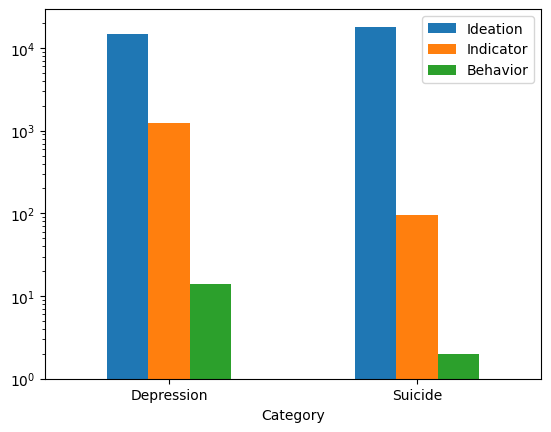

In [2]:
# create data
df = pd.DataFrame([['Depression', 14753, 1235, 13], ['Suicide', 18096, 95, 1]],
                  columns=['Category', 'Ideation', 'Indicator', 'Behavior'])
# view data
# print(df)
  
# plot grouped bar chart
df.plot(x='Category',
        kind='bar',
        log=True,
        rot=0,
        stacked=False)
plt.xlabel('Category')
plt.ylabel('Number of samples')
plt.title('Suicidal Risk Estimation')
plt.show()

In [75]:
import pandas as pd
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')

In [76]:
df

,Unnamed: 0,processed,class,category
0,0,ex wife threatening suiciderecently left wife ...,suicide,1
1,1,weird get affected compliment coming someone k...,non-suicide,0
2,2,finally almost never hear ha bad year ever swe...,non-suicide,0
3,3,need helpjust help im cry hard,suicide,1
4,4,losthello name adam struggling year afraid pas...,suicide,1
...,...,...,...,...
232069,232069,like rock going get anything go http musictast...,non-suicide,0
232070,232070,tell many friend lonely everything deprived pr...,non-suicide,0
232071,232071,pee probably taste like salty tea someone dran...,non-suicide,0
232072,232072,usual stuff find herei posting sympathy pity k...,suicide,1


In [77]:
df.category.value_counts()

1    116037
0    116037
Name: category, dtype: int64

In [49]:
clf

SVC(degree=2, gamma=0.7)

In [50]:
df=df.dropna()

In [51]:
vectorized_data_red = pipeline.transform(df['processed'])

In [ ]:
# vectorized_data_red_array = vectorized_data_red.toarray()

In [52]:
result = clf.predict(vectorized_data_red)

In [55]:
df['suicide_intensity'] = result
df['intensity'] = list(Le.inverse_transform(result))
df.to_csv(path+'reddit_dataset_with_CSSR_intensity.csv')
p = df.groupby(['class', 'intensity']).count()
p

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0  processed  category  suicide_intensity
class       intensity                                                    
non-suicide Attempt             2          2         2                  2
            Behavior           74         74        74                 74
            Ideation       112929     112929    112929             112929
            Indicator        2971       2971      2971               2971
suicide     Attempt             7          7         7                  7
            Behavior          146        146       146                146
            Ideation       115014     115014    115014             115014
            Indicator         853        853       853                853

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(path+'reddit_dataset_with_CSSR_intensity.csv')

In [6]:
p = df.groupby(['class', 'intensity']).count()

In [7]:
p['suicide_intensity'].get('suicide')

intensity
Attempt           7
Behavior        146
Ideation     115014
Indicator       853
Name: suicide_intensity, dtype: int64

In [9]:
q = p.transpose()

In [14]:
q

class             non-suicide                             suicide           \
intensity             Attempt Behavior Ideation Indicator Attempt Behavior   
Unnamed: 0                  2       74   112929      2971       7      146   
Unnamed: 0.1                2       74   112929      2971       7      146   
processed                   2       74   112929      2971       7      146   
category                    2       74   112929      2971       7      146   
suicide_intensity           2       74   112929      2971       7      146   

class                                 
intensity         Ideation Indicator  
Unnamed: 0          115014       853  
Unnamed: 0.1        115014       853  
processed           115014       853  
category            115014       853  
suicide_intensity   115014       853

In [13]:
for i, j in q.columns:
    print(j)

Attempt
Behavior
Ideation
Indicator
Attempt
Behavior
Ideation
Indicator


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

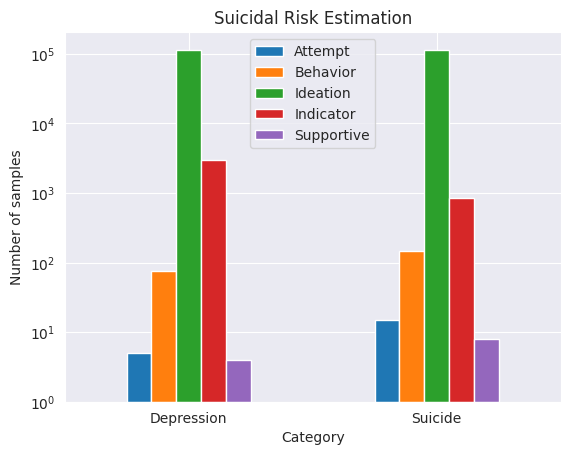

In [13]:
# create data
df = pd.DataFrame([['Depression',4,74,112924,2971,3], 
                   ['Suicide',14,146,115000,853,7]
                  ],
              columns=['Category', 
                       'Attempt',
                       'Behavior',
                       'Ideation',
                       'Indicator', 
                       'Supportive',
                      ]
                 )
# view data
# print(df)
  
# plot grouped bar chart
df.plot(x='Category',
        kind='bar',
        log=True,
        rot=0,
        stacked=False)
plt.xlabel('Category')
plt.ylabel('Number of samples')
plt.title('Suicidal Risk Estimation')
plt.show()

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
import numpy as np
array_vec_1 = np.array([[2,74,112929,2971]])
array_vec_2 = np.array([[7,146,115014,853]])
print(cosine_similarity(array_vec_1, array_vec_2))

[[0.99982147]]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

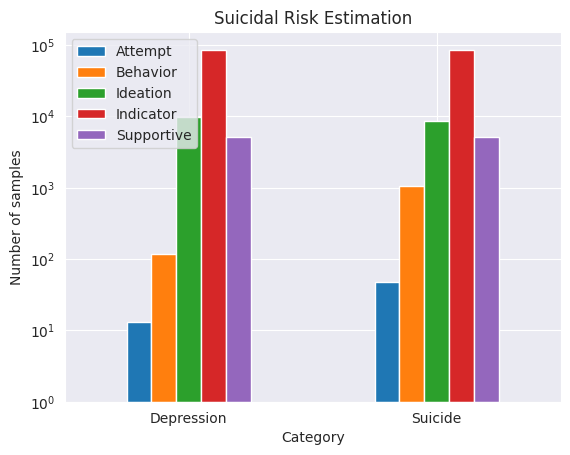

In [10]:
    df = pd.DataFrame([['Depression', 12,118,9703,86098,5155],
                       ['Suicide', 46,1060,8701,85935,5206]],
                      columns=['Category', 'Attempt', 'Behavior', 'Ideation', 'Indicator', 'Supportive'])

#     df = pd.DataFrame([dep, sui_data], columns=COLS)
    df.plot(x='Category',
            kind='bar',
            log=True,
            rot=0,
            stacked=False)
    plt.xlabel('Category')
    plt.ylabel('Number of samples')
    plt.title('Suicidal Risk Estimation')
    plt.show()

#     vec_1 = np.array([dep[1:]])
#     vec_2 = np.array([sui_data[1:]])
#     return cosine_similarity(vec_1, vec_2)